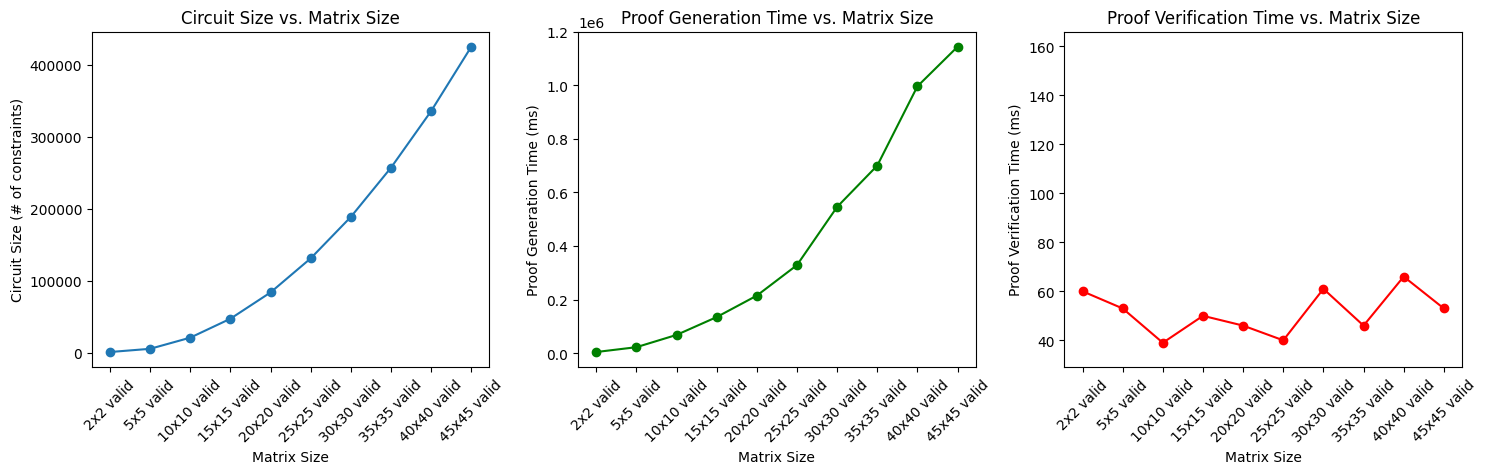

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Helper function to convert time strings to numerical values (milliseconds)
def convert_time_to_ms(time_str):
    if pd.isna(time_str):
        return np.nan
    return float(time_str.replace('ms', '').replace(' ', ''))

# Load the Excel file
file_path = 'benchmarking.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Preprocess the data for plotting
matrix_sizes = data.columns[1:]  # Extract matrix sizes

# Extract and process each parameter
circuit_size = data.iloc[0, 1:].astype(float)
proof_gen_time = data.iloc[2, 1:].apply(convert_time_to_ms)
proof_verif_time = data.iloc[4, 1:].apply(convert_time_to_ms)

# Create plots
plt.figure(figsize=(15, 5))

# Circuit Size vs. Matrix Size
plt.subplot(1, 3, 1)
plt.plot(matrix_sizes, circuit_size, marker='o')
plt.xlabel('Matrix Size')
plt.ylabel('Circuit Size (# of constraints)')
plt.title('Circuit Size vs. Matrix Size')
plt.xticks(rotation=45)

# Proof Generation Time vs. Matrix Size
plt.subplot(1, 3, 2)
plt.plot(matrix_sizes, proof_gen_time, marker='o', color='green')
plt.xlabel('Matrix Size')
plt.ylabel('Proof Generation Time (ms)')
plt.title('Proof Generation Time vs. Matrix Size')
plt.xticks(rotation=45)

# Proof Verification Time vs. Matrix Size
plt.subplot(1, 3, 3)
plt.plot(matrix_sizes, proof_verif_time, marker='o', color='red')
plt.xlabel('Matrix Size')
plt.ylabel('Proof Verification Time (ms)')
plt.title('Proof Verification Time vs. Matrix Size')
plt.xticks(rotation=45)

# Adjust the y-axis scale to emphasize the similarity in verification times
plt.ylim(proof_verif_time.min() - 10, proof_verif_time.max() + 300)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
